In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [17]:
np.random.seed(42)
X,y=make_circles(n_samples=500,factor=0.1,noise=0.35,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [19]:
X.shape

(500, 2)

<Axes: >

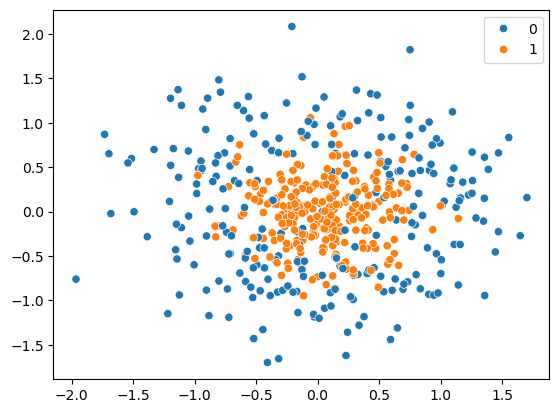

In [21]:
import seaborn as sns
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
clf1=DecisionTreeClassifier(random_state=3)
clf1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=3)

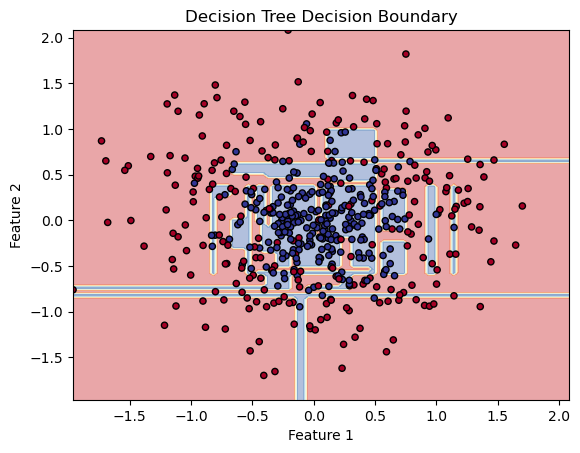

In [30]:
X_range=np.linspace(X.min(),X.max(),100)
xx1, xx2 = np.meshgrid(X_range,X_range)
Z = clf1.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Tree Decision Boundary')
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf=RandomForestClassifier(n_estimators=500,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

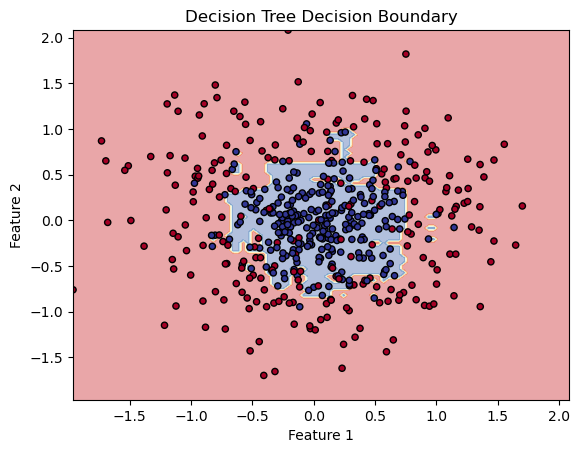

In [36]:
X_range=np.linspace(X.min(),X.max(),100)
xx1, xx2 = np.meshgrid(X_range,X_range)
Z = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Tree Decision Boundary')
plt.show()

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [65]:
# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

In [67]:
# Fit DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=5)
dtree.fit(X, y)

DecisionTreeRegressor(max_depth=5)

In [69]:
# Fit RandomForestRegressor
rforest = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
rforest.fit(X, y)

RandomForestRegressor(max_depth=5, random_state=0)

In [71]:
# Predict over a fine grid for smooth curves
X_test = np.linspace(0, 5, 500).reshape(-1, 1)
y_dtree = dtree.predict(X_test)
y_rforest = rforest.predict(X_test)

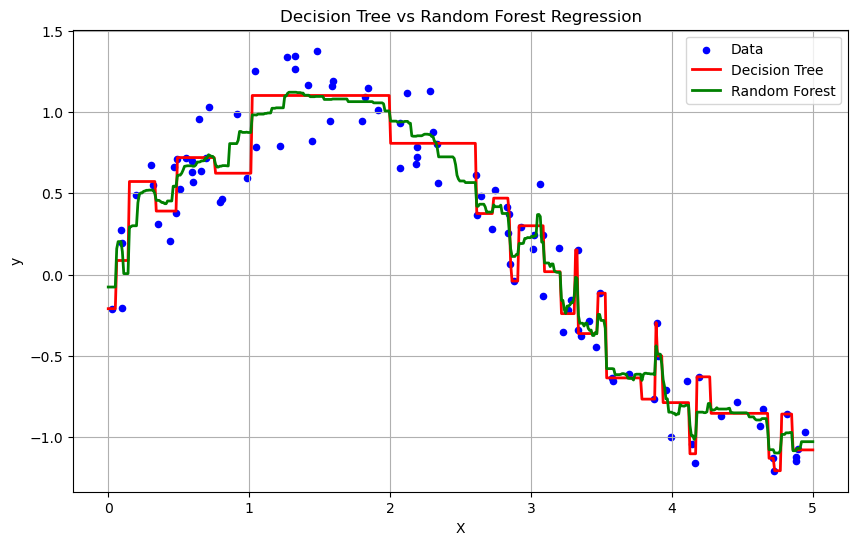

In [73]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='blue', label='Data', s=20)
plt.plot(X_test, y_dtree, color='red', label='Decision Tree', linewidth=2)
plt.plot(X_test, y_rforest, color='green', label='Random Forest', linewidth=2)
plt.title('Decision Tree vs Random Forest Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()